Sveučilište u Zagrebu<br>
Fakultet elektrotehnike i računarstva

## Strojno učenje 2016./2017.

<a href="http://www.fer.unizg.hr/predmet/su">http://www.fer.unizg.hr/predmet/su</a>

### Laboratorijska vježba 3: Stroj potpornih vektora i algoritam k-najbližih susjeda

(c) 2015-2016 Jan Šnajder, Domagoj Alagić

<i>Verzija: 0.2</i> <br/>
<i>Zadnji put ažurirano: 9. studenog 2016.</i> 

Objavljeno: **9. studenog 2016.**<br>
Rok za predaju: U terminu vježbe u tjednu od **14. studenog 2016.**

### Upute

Treća laboratorijska vježba sastoji se od sedam zadataka. Kako bi kvalitetnije, ali i na manje zamoran način usvojili gradivo ovog kolegija, potrudili smo se uključiti tri vrste zadataka: **1)** implementacija manjih algoritama, modela ili postupaka; **2)** eksperimenti s raznim modelima te njihovim hiperparametrima, te **3)** primjena modela na (stvarnim) podatcima. Ovim zadatcima pokrivamo dvije paradigme učenja: učenje izgradnjom (engl. *learning by building*) i učenje eksperimentiranjem (engl. *learning by experimenting*).

U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [4]:
import numpy as np
import scipy as sp
import pandas as pd
import mlutils
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### 1. Klasifikator SVM

#### (a)

Upoznajte se s klasom [`svm.SVC`](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC), koja ustvari implementira sučelje prema implementaciji [`libsvm`](http://www.csie.ntu.edu.tw/~cjlin/libsvm/). Primijenite model `SVC` s linearnom jezgrenom funkcijom (tj. bez preslikavanja primjera u prostor značajki) na skup podataka `seven` (dan niže) s $N=7$ primjera. Ispišite koeficijente $w_0$ i $\mathbf{w}$. Ispišite dualne koeficijente i potporne vektore. Završno, koristeći funkciju `mlutils.plot_2d_svc_problem` iscrtajte podatke, decizijsku granicu i marginu. Funkcija prima podatke, oznake i klasifikator (objekt klase `SVC`). Izračunajte širinu margine.

-- koeficijenti:
w =[ -9.99707031e-01  -2.92968750e-04]
w0 =[ 3.99951172]
dualni =[ -4.99707031e-01  -1.46484375e-04   4.99853516e-01]
---
potporni vektori:  [ 5.  2.] [ 5.  4.] [ 3.  2.] ---
sirina margine = 1.99973958333


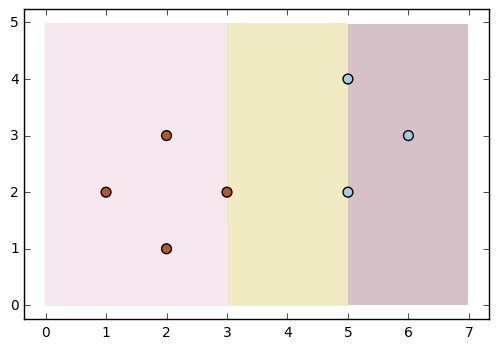

In [5]:
from sklearn.svm import SVC

seven_X = np.array([[2,1], [2,3], [1,2], [3,2], [5,2], [5,4], [6,3]])
seven_y = np.array([1, 1, 1, 1, -1, -1, -1])

# Vaš kôd ovdje...
svc = SVC(kernel='linear')
svc.fit(seven_X, seven_y)

mlutils.plot_2d_svc_problem(seven_X, seven_y, svc)

print "-- koeficijenti:"
print "w =" + str(svc.coef_[0])
print "w0 =" + str(svc.intercept_)
print "dualni =" + str(svc.dual_coef_[0])

print "---"
#print "indeksi potpornih vektora: " + str(svc.support_)
print "potporni vektori: ",
for sv in svc.support_vectors_:
    print sv,
print "---"

distances = np.abs(svc.decision_function(svc.support_vectors_))
print "sirina margine = " + str(np.average(distances) * 2)


**Q:** Koliko iznosi širina margine? <br>
**Q:** Koji primjeri su potporni vektori i zašto?

#### (b)

Definirajte funkciju `hinge(model, x, y)` koja izračunava gubitak zglobnice modela SVM (s linearnom jezgrom) na primjeru `x`. Izračunajte gubitke modela naučenog na skupu `seven` za primjere $\mathbf{x}^{(2)}=(3,2)$ i $\mathbf{x}^{(1)}=(3.5,2)$ koji su označeni pozitivno ($y=1$) te za $\mathbf{x}^{(3)}=(4,2)$ koji je označen negativno ($y=-1$). Također, izračunajte prosječni gubitak SVM-a na skupu `seven`. Uvjerite se da je rezultat identičan onome koji biste dobili primjenom ugrađene funkcije [`metrics.hinge_loss`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.hinge_loss.html).

In [6]:
from sklearn.metrics import hinge_loss

def hinge(model, x, y):
    x = x.reshape(1, -1)
    d = model.decision_function(x)[0]

    if d < 1.0:
        return 1.0 - d
    else:
        return 0.0

X_2 = np.array([[3,2],[3.5,2],[4,2]])
Y_2 = np.array([1, 1, -1])

total_loss = 0.0
for x, y in zip(X_2, Y_2):
    loss = hinge(svc, x, y)
    print "x = " + str(x) + ", y = " + str(y) + " | hinge: " + str(loss)
    total_loss += loss

average_loss = total_loss / float(len(X_2))

print "Prosjecni gubitak (hinge): " + str(average_loss)
print "Prosjecni gubitak (hinge_loss): " + str(hinge_loss(Y_2, svc.decision_function(X_2)))

x = [ 3.  2.], y = 1 | hinge: 0.000195312499999
x = [ 3.5  2. ], y = 1 | hinge: 0.500048828125
x = [ 4.  2.], y = -1 | hinge: 0.99990234375
Prosjecni gubitak (hinge): 0.500048828125
Prosjecni gubitak (hinge_loss): 0.500113932292



#### (c)

Vratit ćemo se na skupove podataka `outlier` ($N=8$) i `unsep` ($N=8$) iz prošle laboratorijske vježbe (dani niže) i pogledati kako se model SVM-a nosi s njima. Naučite ugrađeni model SVM-a (s linearnom jezgrom) na ovim podatcima i iscrtajte decizijsku granicu (skupa s marginom). Također ispišite točnost modela korištenjem funkcije [`metrics.accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html).

In [7]:
from sklearn.metrics import accuracy_score

outlier_X = np.append(seven_X, [[12,8]], axis=0)
outlier_y = np.append(seven_y, -1)

unsep_X = np.append(seven_X, [[2,2]], axis=0)
unsep_y = np.append(seven_y, -1)

Tocnost modela (outlier):  1.0
Tocnost modela (unsep):  0.875


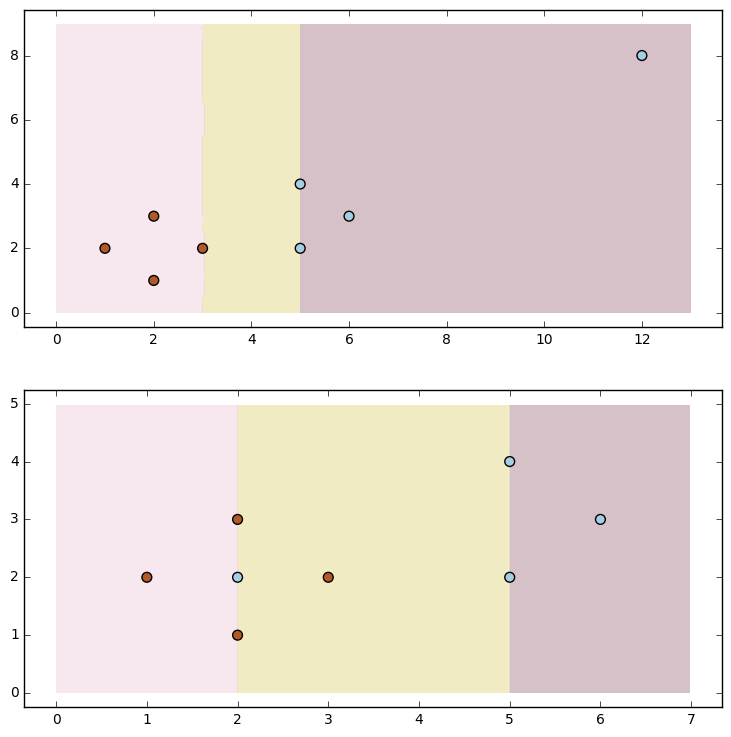

In [8]:
# Vaš kôd ovdje...

plt.figure(figsize=(9,9))

plt.subplot(211)
svc1 = SVC(kernel='linear')
svc1.fit(outlier_X, outlier_y)

mlutils.plot_2d_svc_problem(outlier_X, outlier_y, svc1)

svc2 = SVC(kernel='linear')
svc2.fit(unsep_X, unsep_y)

plt.subplot(212)
mlutils.plot_2d_svc_problem(unsep_X, unsep_y, svc2)

print 'Tocnost modela (outlier): ', accuracy_score(outlier_y, svc1.predict(outlier_X))
print 'Tocnost modela (unsep): ', accuracy_score(unsep_y, svc2.predict(unsep_X))


**Q:** Zašto stršeća vrijednost ne utječe na SVM? <br>
**Q:** Kako se linearan SVM nosi s linearno neodvojivim skupom podataka? <br>
**Q:** Zašto SVM ipak uspjeva pronaći nekakvu granicu kod linearno neodvojivog problema, iako koristimo linearnu jezgru?

### 2. Nelinearan SVM

Ovaj zadatak pokazat će kako odabir jezgre utječe na kapacitet SVM-a. Na skupu `unsep` iz prošlog zadatka trenirajte tri modela SVM s različitim jezgrenim funkcijama: linearnom, polinomijalnom i radijalnom baznom (RBF) funkcijom. Varirajte parametar $C$ po vrijednostima $C\in\{10^{-2},1,10^2\}$, dok za ostale parametre (stupanj polinoma za polinomijalnu jezgru odnosno parametar $\gamma$ za jezgru RBF) koristite podrazumijevane vijednosti. Prikažite granice između klasa (i margine) na grafikonu organiziranome u polje $3x3$, gdje su stupci različite jezgre, a retci različite vrijednosti parametra $C$.

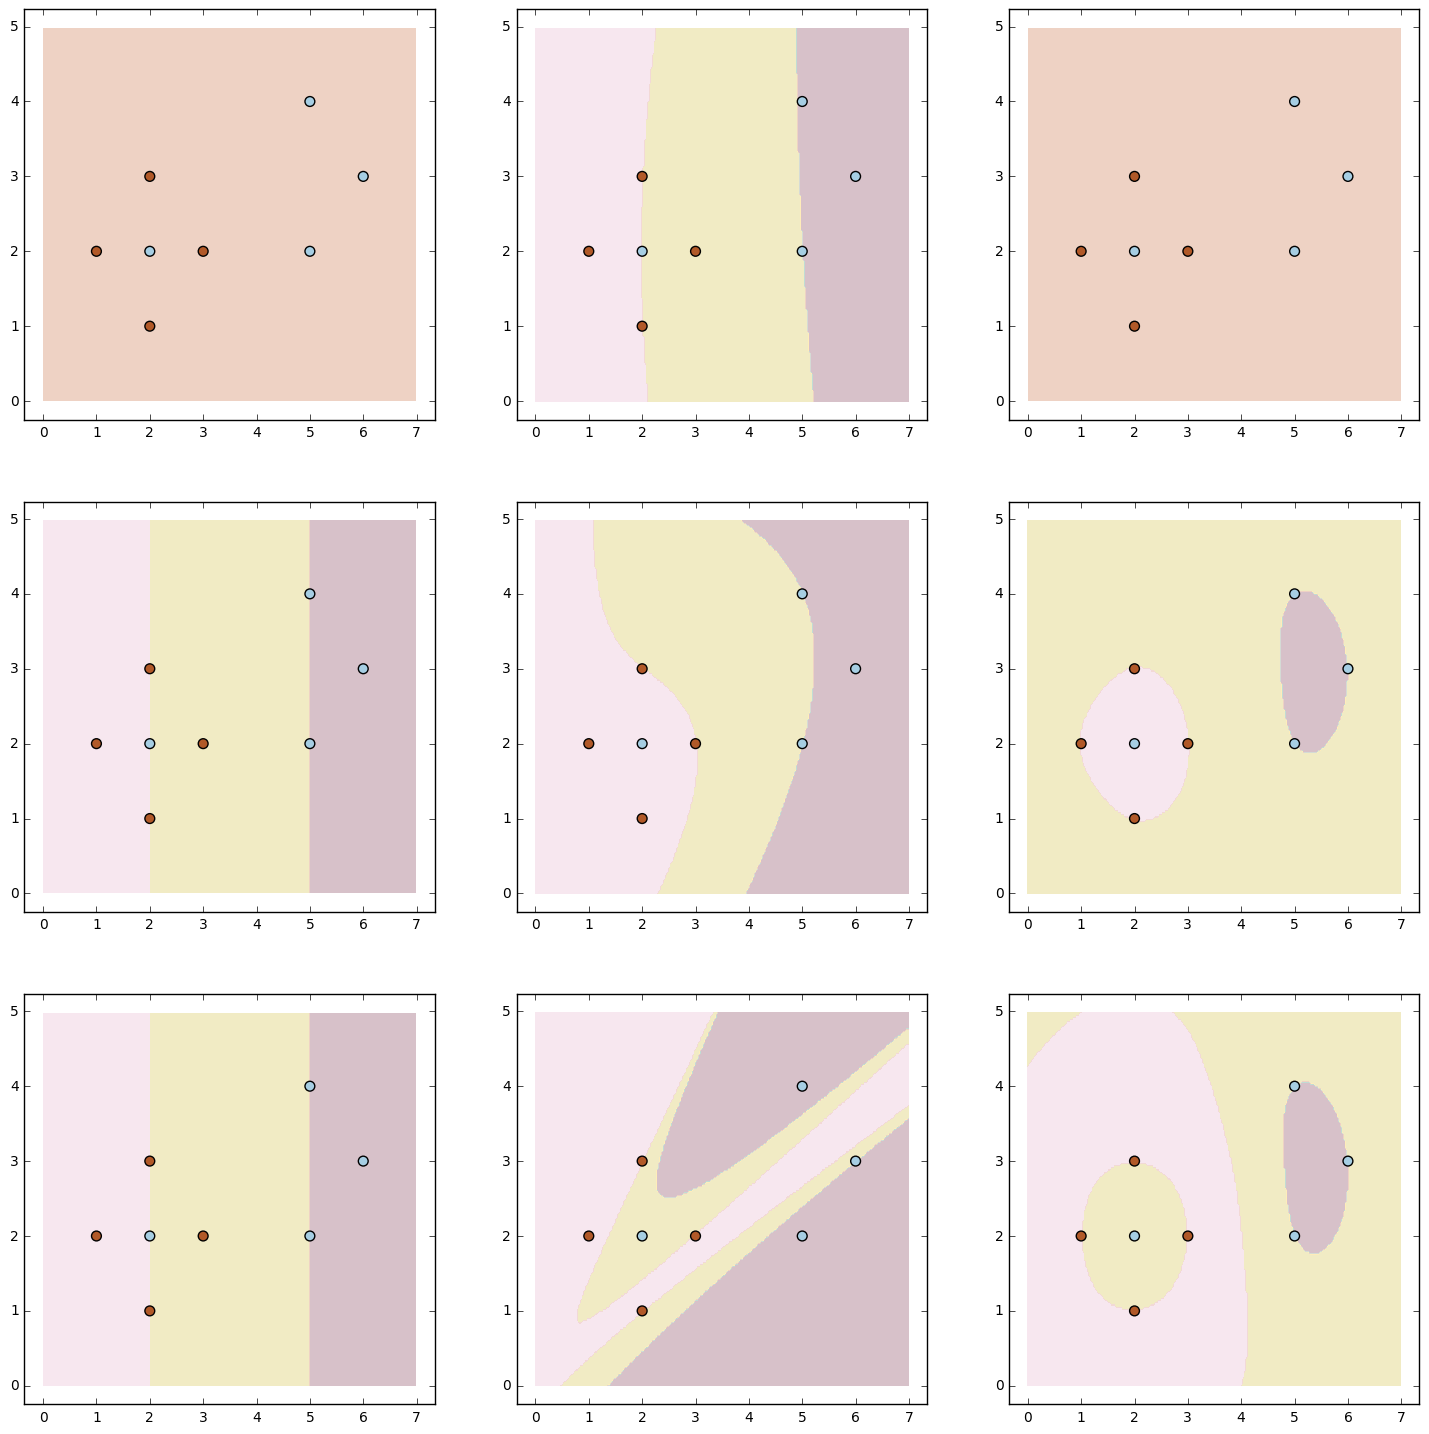

In [9]:
# Vaš kôd ovdje...
plt.figure(figsize=(18, 18))

count = 1
for c in [0.01, 1.0, 100.0]:
    for ker in ['linear', 'poly', 'rbf']:
        model = SVC(C=c, kernel=ker)
        model.fit(unsep_X, unsep_y)
        plt.subplot(3, 3, count)
        mlutils.plot_2d_svc_problem(unsep_X, unsep_y, model)
        count += 1

### 3. Optimizacija hiperparametara SVM-a

Pored hiperparametra $C$, model SVM s jezgrenom funkcijom RBF ima i dodatni hiperparametar $\gamma=\frac{1}{2\sigma^2}$ (preciznost). Taj parametar također određuje složenost modela: velika vrijednost za $\gamma$ znači da će RBF biti uska, primjeri će biti preslikani u prostor u kojem su (prema skalarnome produktu) međusobno vrlo različiti, što će rezultirati složenijim modelima. Obrnuto, mala vrijednost za $\gamma$ znači da će RBF biti široka, primjeri će biti međusobno sličniji, što će rezultirati jednostavnijim modelima. To ujedno znači da, ako odabremo veći $\gamma$, trebamo jače regularizirati model, tj. trebamo odabrati manji $C$, kako bismo spriječili prenaučenost. Zbog toga je potrebno zajednički optimirati hiperparametre $C$ i $\gamma$, što se tipično radi iscrpnim pretraživanjem po rešetci (engl. *grid search*). Ovakav pristup primjenjuje se kod svih modela koji sadrže više od jednog hiperparametra.


#### (a)

Definirajte funkciju 

> `grid_search(X_train, X_validate, y_train, y_validate, (c1,c2), (g1,g2), error_surface=False)` 

koja optimizira parametre $C$ i $\gamma$ pretraživanjem po rešetci. Funkcija treba pretražiti parametre $C\in\{2^{c_1},2^{c_1+1},\dots,2^{c_2}\}$ i $\gamma\in\{2^{g_1},2^{g_1+1},\dots,2^{g_2}\}$. Funkcija treba vratiti optimalne parametre $(C^*,\gamma^*)$, tj. one za koje na skupu za provjeru model ostvaruju najmanju pogrešku. Dodatno, ako je `surface=True`, funkcija treba vratiti matrice (tipa `ndarray`) pogreške modela (očekivanje gubitka 0-1) na skupu za učenje i skupu za provjeru. Svaka je matrica dimenzija $(c_2-c_1+1)\times(g_2-g_1+1)$ (retci odgovaraju različitim vrijednostima za $C$, a stupci različitim vrijednostima za $\gamma$).

In [10]:
from sklearn.metrics import accuracy_score, zero_one_loss

def grid_search(X_train, X_validate, y_train, y_validate, (c1,c2), (g1,g2), error_surface=False) :
    # Vaš kôd ovdje...
    c_exps = range(c1, c2+1, 1)
    g_exps = range(g1, g2+1, 1)
    
    train_surface = np.zeros((len(c_exps), len(g_exps)))
    validate_surface = np.zeros((len(c_exps), len(g_exps)))
    
    for c_exp, g_exp in [(a, b) for a in c_exps for b in g_exps]:
        model = SVC(C=2**c_exp, gamma= 2**g_exp)
        model.fit(X_train,y_train)
        
        predicted_train = model.predict(X_train)
        predicted_validate = model.predict(X_validate)
        
        train_surface[c_exp - c1, g_exp - g1] = zero_one_loss(y_train, predicted_train)
        validate_surface[c_exp - c1, g_exp - g1] = zero_one_loss(y_validate, predicted_validate)
    
    min_error = validate_surface[0][0]
    min_index = (0, 0)
    
    for i in range(len(validate_surface)):
        for j in range(len(validate_surface[i])):
            if validate_surface[i][j] < min_error:
                min_error = validate_surface[i][j]
                min_index = (i, j)
            
    best_c = min_index[0] + c1
    best_g = min_index[1] + g1
    
    if error_surface:
        return 2**best_c, 2**best_g, train_surface, validate_surface
    else:
        return 2**best_c, 2**best_g

#### (b)

Pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) generirajte **dva** skupa podataka od $N=200$ primjera: jedan s $n=2$ dimenzije i drugi s $n=1000$ dimenzija. Primjeri neka dolaze iz dviju klasa, s time da svakoj klasi odgovaraju dvije grupe (`n_clusters_per_class=2`), kako bi problem bio nešto složeniji, tj. nelinearniji. Neka sve značajke budu informativne. Podijelite skup primjera na skup za učenje i skup za ispitivanje u omjeru 1:1.

Na oba skupa optimirajte SVM s jezgrenom funkcijom RBF, u rešetci $C\in\{2^{-5},2^{-4},\dots,2^{15}\}$ i $\gamma\in\{2^{-15},2^{-14},\dots,2^{3}\}$. Prikažite površinu pogreške modela na skupu za učenje i skupu za provjeru, i to na oba skupa podataka (ukupno četiri grafikona) te ispišite optimalne kombinacije hiperparametara. Prikažite i granicu između klasa za dvodimenzijski skup. Za prikaz površine pogreške modela možete koristiti funkciju `plot_error_surface` iz paketa `mlutils`.

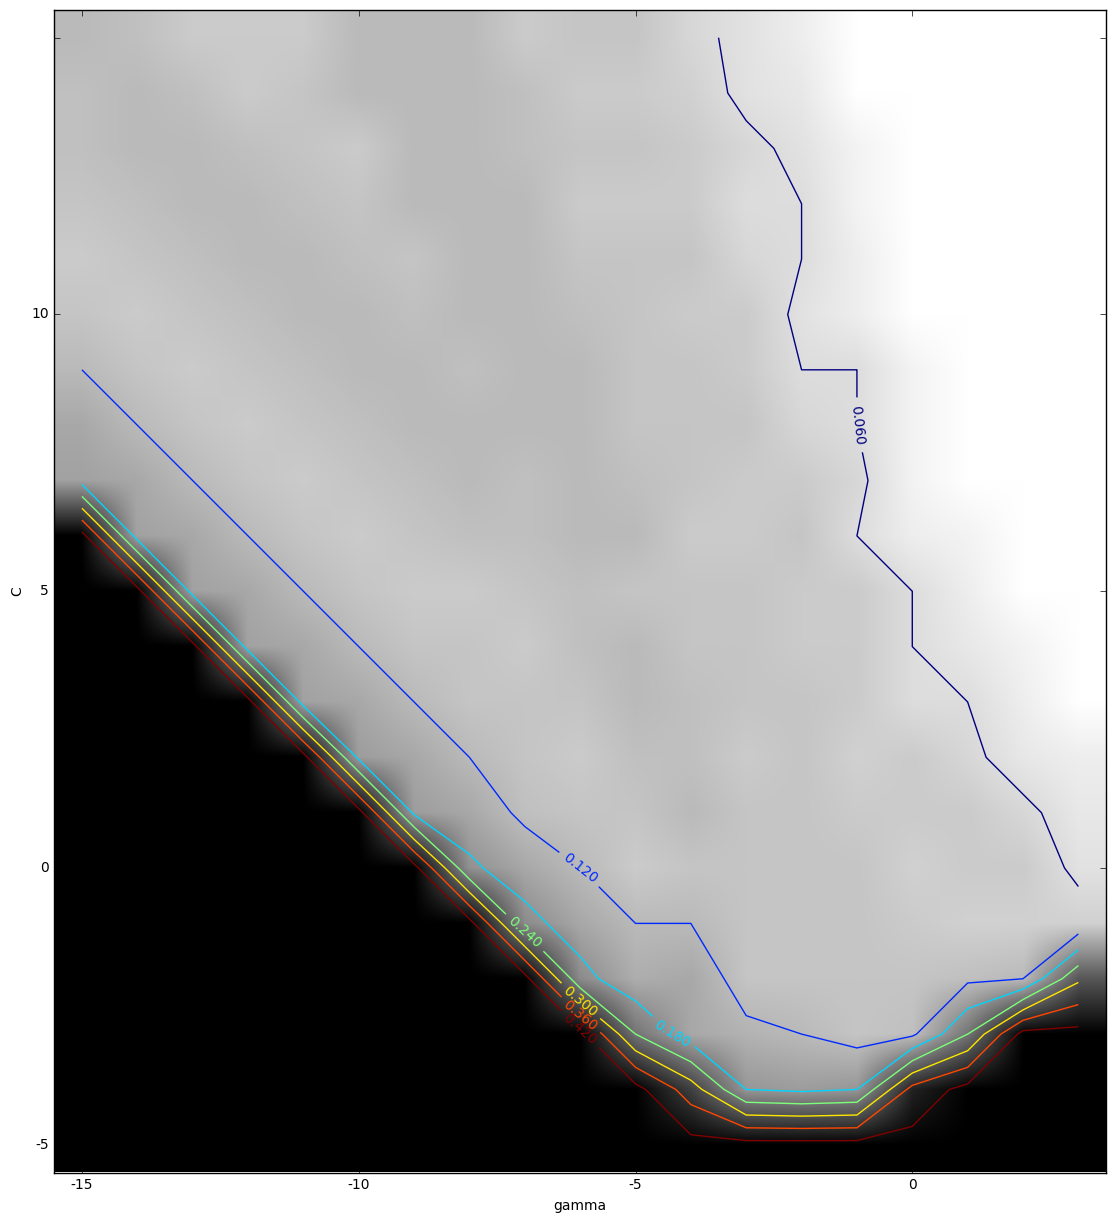

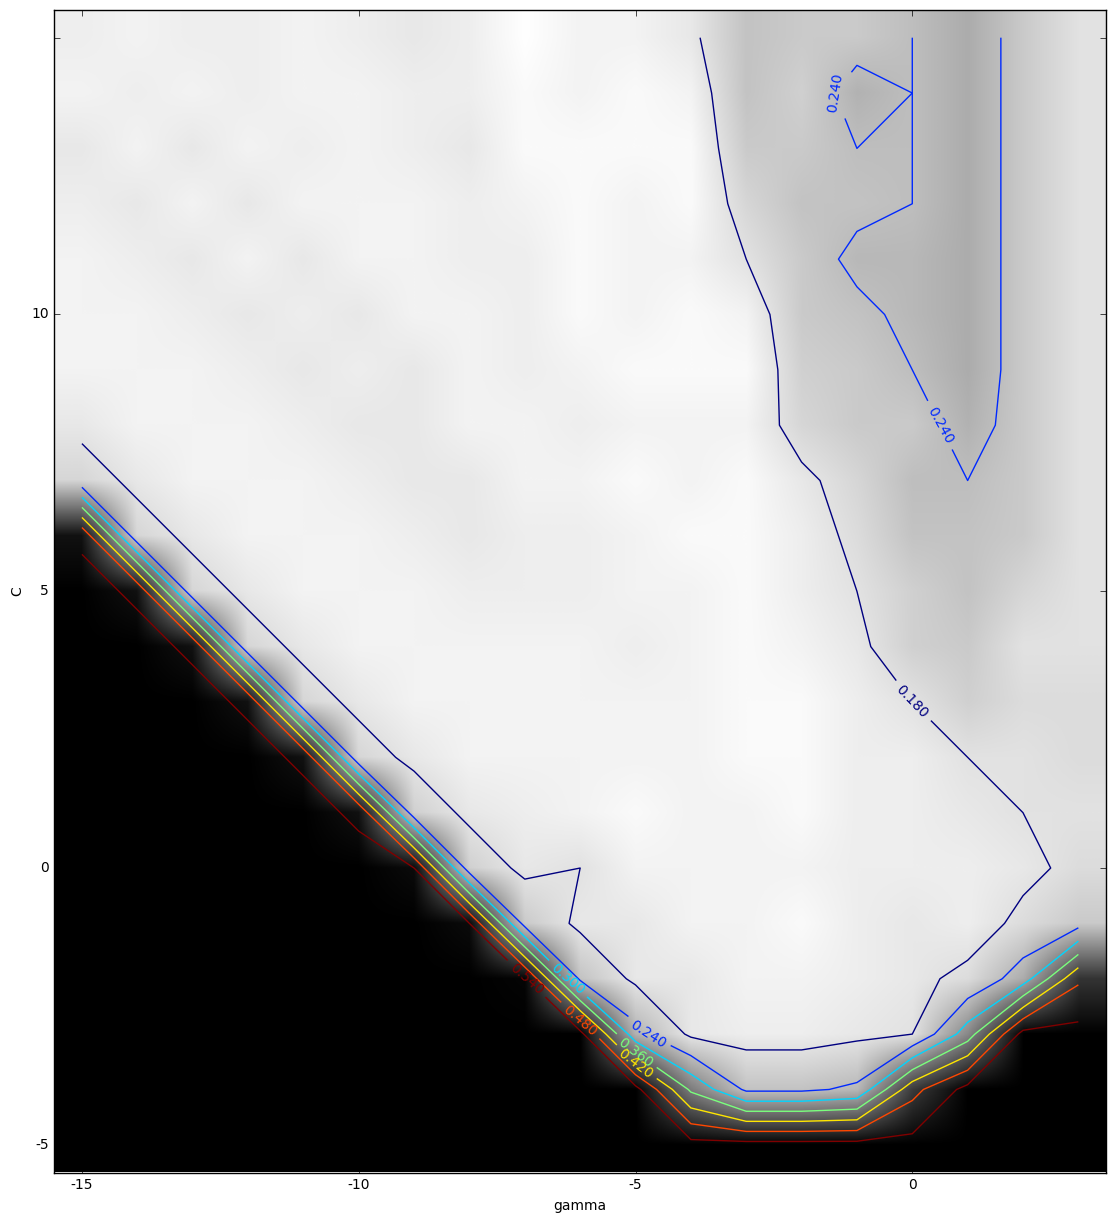

n = 2, C = 32768, gamma = 0.0078125


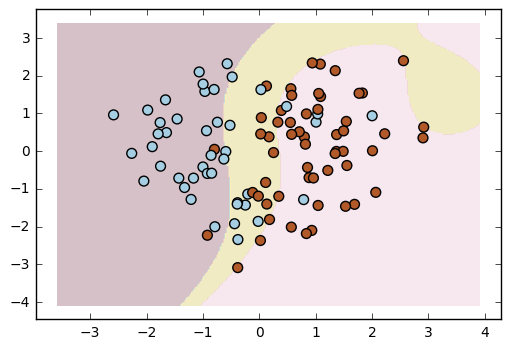

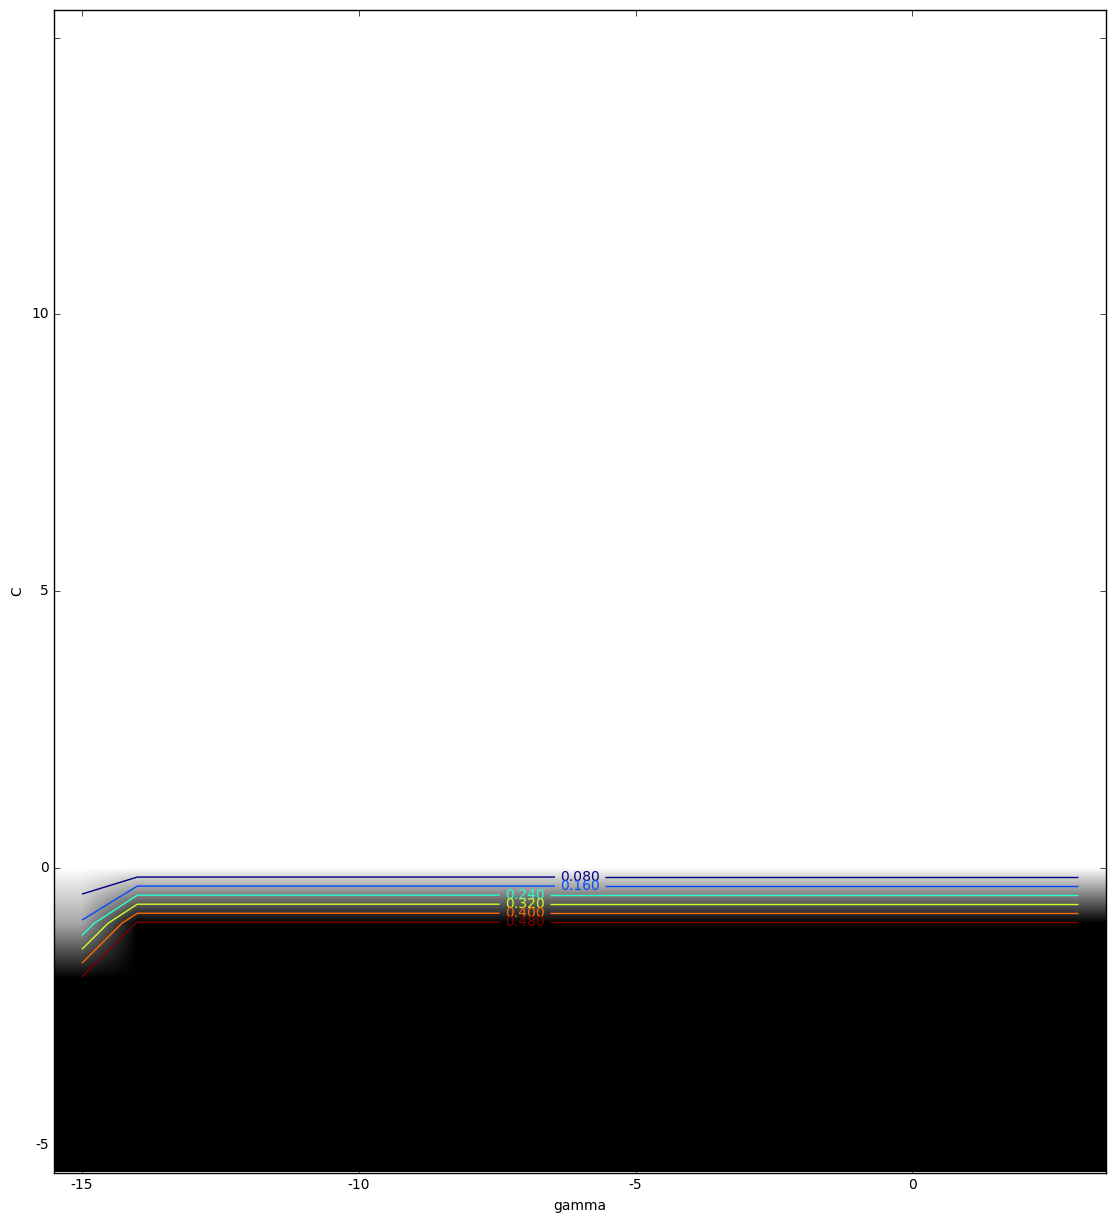

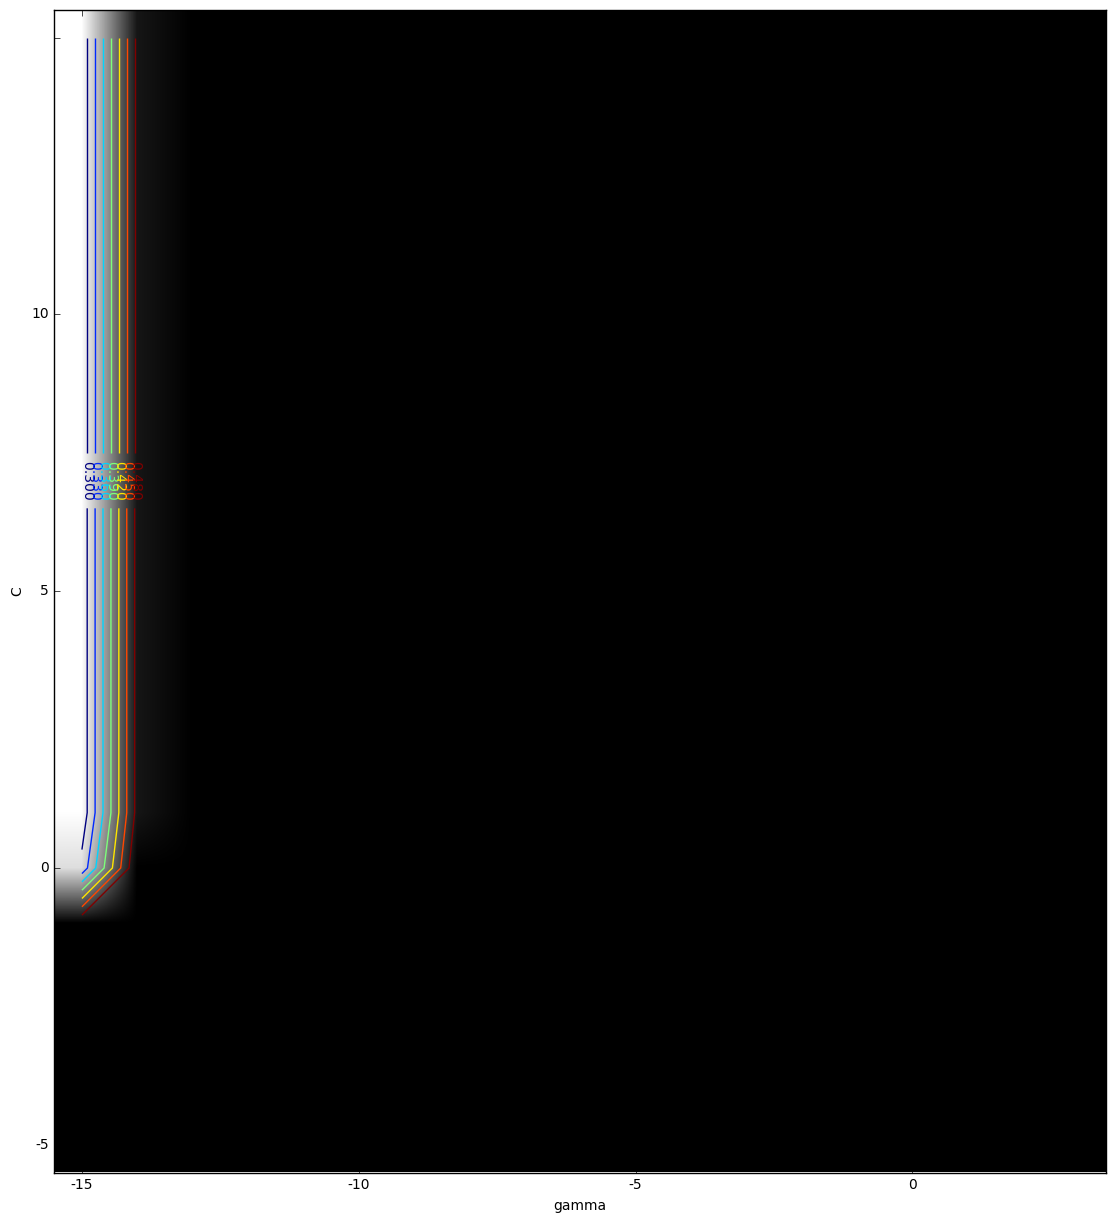

n = 400, C = 2, gamma = 3.0517578125e-05


In [11]:
from sklearn.datasets import make_classification
from sklearn.cross_validation import train_test_split
#from mlutils import plot_error_surface

# from mlutils.py
def plot_error_surface(err, (c1,c2), (g1,g2)):
    plt.xticks(range(0, g2-g1+1, 5),range(g1, g2, 5))
    plt.xlabel("gamma")
    plt.yticks(range(0, c2-c1+1, 5),range(c1, c2, 5))
    plt.ylabel("C")
    
    p = plt.contour(err)
    
    plt.imshow(1-err, interpolation='bilinear', origin='lower',cmap=cm.gray)
    plt.clabel(p, inline=1, fontsize=10)
    plt.show()

# Vaš kôd ovdje...
cs, gs = (-5,15),(-15,3)

for n in [2, 400]:
    Xmain, ymain = make_classification(n_samples=200,n_features=n, n_clusters_per_class=2,n_redundant=0,n_informative=n,random_state = 42)
    Xtrain, Xtest, ytrain, ytest = train_test_split(Xmain, ymain, test_size = 0.5, random_state = 42)
    
    C, gamma, surf_train, surf_valid = grid_search(Xtrain, Xtest, ytrain, ytest, cs, gs, True)

    plt.figure(figsize=(15,15))    
    plot_error_surface(surf_train, cs, gs)
    
    try:
        plt.figure(figsize=(15,15))
        plot_error_surface(surf_valid, cs, gs)
    except ValueError:
        print "exception"
    
    if n == 2:
        model = SVC(kernel='rbf', C=C, gamma=gamma)
        model.fit(Xtrain, ytrain)
        mlutils.plot_2d_svc_problem(Xtrain, ytrain, model)
        
    print "n = " + str(n) + ", C = " + str(C) + ", gamma = " + str(gamma)

**Q:** Razlikuje li se površina pogreške na skupu za učenje i skupu za ispitivanje? Zašto? <br>
**Q:** U prikazu površine pogreške, koji dio površine odgovara prenaučenosti, a koji podnaučenosti? Zašto? <br>
**Q:** Kako broj dimenzija $n$ utječe na površinu pogreške, odnosno na optimalne hiperparametre $(C^*, \gamma^*)$? <br>
**Q:** Preporuka je da povećanje vrijednosti za $\gamma$ treba biti popraćeno smanjenjem vrijednosti za $C$. Govore li vaši rezultati u prilog toj preporuci? Obrazložite. <br>
**Q:** Podrazumijevana vrijednost parametara je $C=1$ i $\gamma=1/n$. Bi li te vrijednosti bile optimalne u ovom slučaju?

### 4. Utjecaj standardizacije značajki kod SVM-a

Za mnoge je modele bitno prije treniranja skalirati značajke, kako bi se spriječilo da značajke s većim numeričkim rasponima dominiraju nad onima s manjim numeričkim rasponima. To vrijedi i za SVM, kod kojega skaliranje nerijetko može znatno poboljšati rezultate. Svrha ovog zadataka jest eksperimentalno utvrditi utjecaj skaliranja značajki na točnost SVM-a.

Generirat ćemo dvoklasni skup od $N=500$ primjera s $n=2$ značajke, tako da je dimenzija $x_1$ većeg iznosa i većeg raspona od dimenzije $x_0$, te ćemo dodati jedan primjer koji vrijednošću značajke $x_1$ odskače od ostalih primjera:

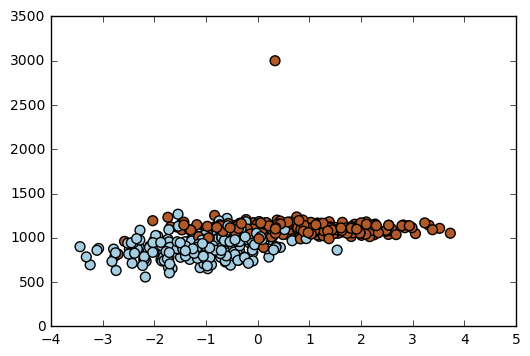

In [12]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=500,n_features=2,n_classes=2,n_redundant=0,n_clusters_per_class=1)
X[:,1] = X[:,1]*100+1000
X[0,1] = 3000

mlutils.plot_2d_svc_problem(X, y)

#### (a)

Proučite funkciju za iscrtavanje histograma [`hist`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist). Prikažite histograme vrijednosti značajki $x_0$ i $x_1$ (ovdje i u sljedećim zadatcima koristite `bins=50`).

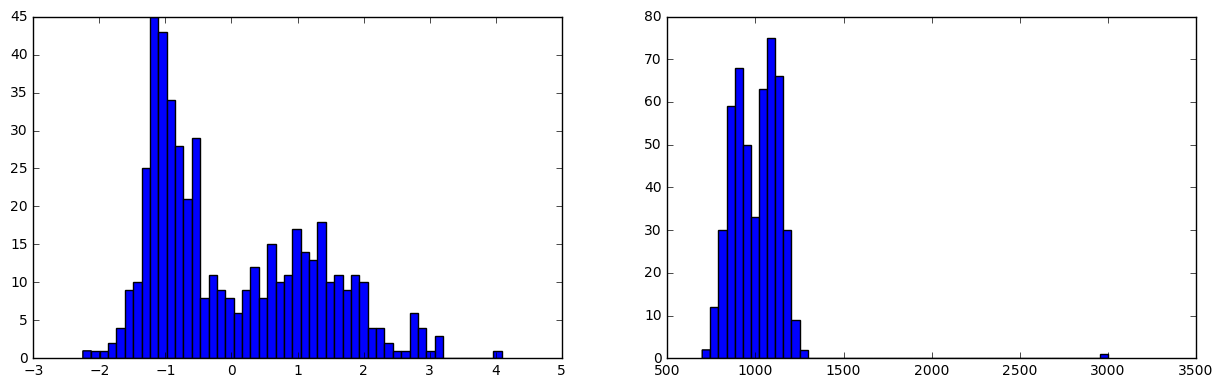

In [10]:
# Vaš kôd ovdje...
plt.figure(figsize=(15,15))
plt.subplot(3,2,1),plt.hist(X[:,0], bins=50);
plt.subplot(3,2,2),plt.hist(X[:,1], bins=50);

#### (b)

Proučite razred [`preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html). Prikažite histograme vrijednosti značajki $x_0$ i $x_1$ ako su iste skalirane min-max skaliranjem (ukupno dva histograma).

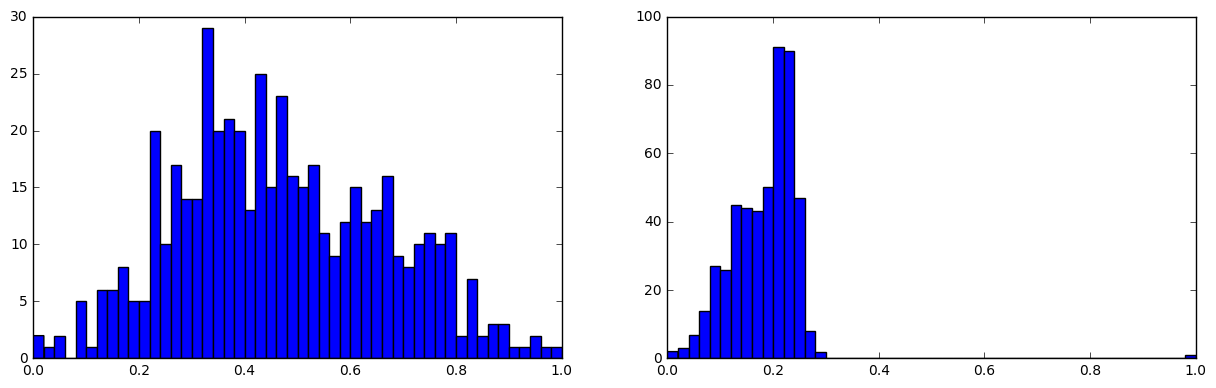

In [13]:
from sklearn.preprocessing import MinMaxScaler

# Vaš kôd ovdje...
mms = MinMaxScaler().fit_transform(X)

plt.figure(figsize=(15,15))
plt.subplot(3,2,1),plt.hist(mms[:,0], bins=50);
plt.subplot(3,2,2),plt.hist(mms[:,1], bins=50);

**Q:** Kako radi ovo skaliranje? <br>
**Q:** Dobiveni histogrami su vrlo slični. U čemu je razlika? <br>

#### (c)

Proučite razred [`preprocessing.StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Prikažite histograme vrijednosti značajki $x_0$ i $x_1$ ako su iste skalirane standardnim skaliranjem (ukupno dva histograma).

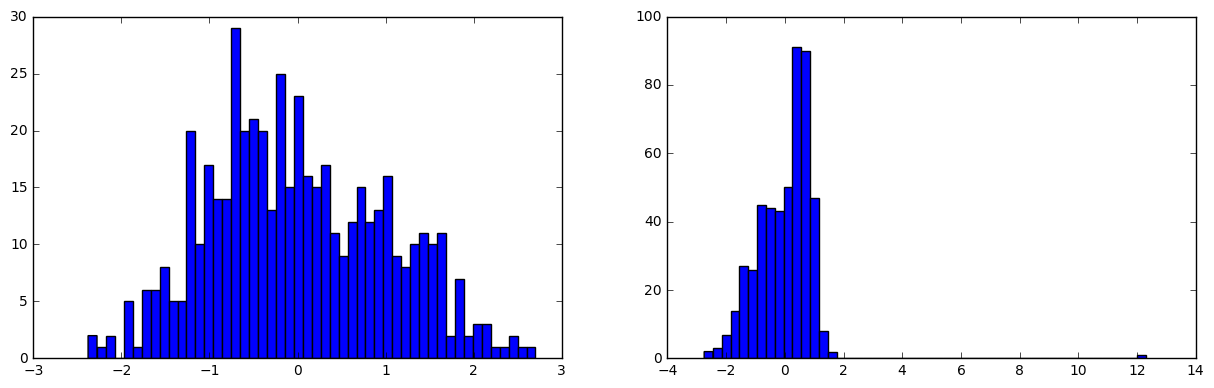

In [14]:
from sklearn.preprocessing import StandardScaler

# Vaš kôd ovdje...
ss = StandardScaler().fit_transform(X)

plt.figure(figsize=(15,15))
plt.subplot(3,2,1),plt.hist(ss[:,0], bins=50);
plt.subplot(3,2,2),plt.hist(ss[:,1], bins=50);

**Q:** Kako radi ovo skaliranje? <br>
**Q:** Dobiveni histogrami su vrlo slični. U čemu je razlika? <br>

#### (d)

Podijelite skup primjera na skup za učenje i skup za ispitivanje u omjeru 1:1. Trenirajte SVM s jezgrenom funkcijom RBF na skupu za učenje i ispitajte točnost modela na skupu za ispitivanje, koristeći tri varijante gornjeg skupa: neskalirane značajke, standardizirane značajke i min-max skaliranje. Koristite podrazumijevane vrijednosti za $C$ i $\gamma$. Izmjerite točnost svakog od triju modela na skupu za učenje i skupu za ispitivanje. Ponovite postupak više puta (npr. 30) te uprosječite rezultate (u svakom ponavljanju generirajte podatke kao što je dano na početku ovog zadatka).

**NB:** Na skupu za učenje treba najprije izračunati parametre skaliranja te zatim primijeniti skaliranje (funkcija `fit_transform`), dok na skupu za ispitivanje treba samo primijeniti skaliranje s parametrima koji su dobiveni na skupu za učenje (funkcija `transform`).

In [17]:
# Vaš kôd ovdje...
for name, scaler in zip(['raw', 'std', 'maxmin'], [None, StandardScaler(), MinMaxScaler()]):
    model = SVC(kernel='rbf')
    err = np.zeros(2)
    
    iterations = 30
    for i in range(iterations):
        Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.5)
        
        if not (scaler is None):
            Xtrain = scaler.fit_transform(Xtrain)    
            Xtest = scaler.transform(Xtest)
        
        model.fit(Xtrain, ytrain)
        err[0] += zero_one_loss(ytrain, model.predict(Xtrain))
        err[1] += zero_one_loss(ytest, model.predict(Xtest))
    
    if not scaler is None:
        print "--- " + str(scaler)
    else:
        print "--- No scaling"

    print "Train error:" + str(err[0] / float(iterations))
    print "Test err:" + str(err[1] / float(iterations))

--- No scaling
Train error:0.0110666666667
Test err:0.1668
--- StandardScaler(copy=True, with_mean=True, with_std=True)
Train error:0.0658666666667
Test err:0.0709333333333
--- MinMaxScaler(copy=True, feature_range=(0, 1))
Train error:0.104666666667
Test err:0.1088


**Q:** Jesu li rezultati očekivani? Obrazložite. <br>
**Q:** Bi li bilo dobro kada bismo funkciju `fit_transform` primijenili na cijelom skupu podataka? Zašto? Bi li bilo dobro kada bismo tu funkciju primijenili zasebno na skupu za učenje i zasebno na skupu za ispitivanje? Zašto?

### 5. k-najbližih susjeda

U ovom zadatku promatrat ćemo jednostavan klasifikacijski model imena **algoritam k-najbližih susjeda**. Najprije ćete ga samostalno isprogramirati kako biste se detaljno upoznali s radom ovog modela, a zatim ćete prijeći na analizu njegovih hiperparametara (koristeći ugrađeni razred, zbog efikasnosti).

#### (a)

Implementirajte klasu `KNN` koja implementira algoritam $k$ najbližih susjeda. Neobavezan parametar konstruktora jest broj susjeda `n_neighbours` ($k$), čija je podrazumijevana vrijednost 3. Definirajte metode `fit(X, y)` i `predict(X)`, koje služe za učenje modela odnosno predikciju. Kao mjeru udaljenosti koristite euklidsku udaljenost ([`scipy.linalg.norm`](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.norm.html); pripazite na parametar `axis`). Nije potrebno implementirati nikakvu težinsku funkciju.

In [18]:
from scipy.linalg import norm
from scipy.stats.mstats import mode
from scipy.spatial.distance import cdist
from bisect import insort

class KNN:
    def __init__(self, n_neighbors=3):
        # Vaš kôd ovdje...
        self._k = n_neighbors
        
    def fit(self, X_train, y_train):
        # Vaš kôd ovdje...
        self._X, self._y = X_train, y_train
        return self
        
    def predict(self, X_test):
        # Vaš kôd ovdje...
        
        y = []
        for x in X_test:
            y.append(self.predict_one(x))
        
        return np.array(y)
        #return mode(self._y[np.argsort(cdist(X_test, self._X),axis=1)[:,:self._k]],axis=1)[0][:,0].astype(np.int)
    
    def predict_one(self, x):
        pairs = [(norm(x - xi), i) for i, xi in enumerate(self._X)]
        sorted_pairs = sorted(pairs, key = lambda a: a[0])
        indices = zip(*sorted_pairs)[1][:self._k]
        
        ys = np.array([self._y[index] for index in indices])
        
        return int(mode(ys)[0][0])


#### (b)

Kako biste se uvjerili da je Vaša implementacija ispravna, usporedite ju s ugrađenom implementacijom u razredu [`neighbors.KNeighborsClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). Budući da spomenuti razred koristi razne optimizacijske trikove pri pronalasku najboljih susjeda, obavezno postavite parametar `algorithm=brute`, jer bi se u protivnom moglo dogoditi da Vam se predikcije razlikuju. Usporedite modele na sljedećem (umjetnom) skupu podataka:

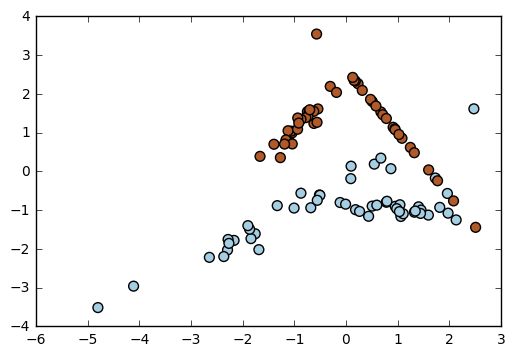

In [19]:
from sklearn.datasets import make_classification
X_art, y_art = make_classification(n_samples=100, n_features=2, n_classes=2, n_redundant=0, n_clusters_per_class=2)
mlutils.plot_2d_clf_problem(X_art, y_art)

In [20]:
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.datasets import make_classification

pred = []

for knn in [KNN(), KNC(n_neighbors=3)]:
    print knn
    knn.fit(X_art, y_art)
    pred.append(knn.predict(X))

pred = np.array(pred)
y1 = pred[0]
y2 = pred[1]

for i in range(len(y1)):
    if y1[i] != y2[i]:
        print "Algorithms dont match!"

<__main__.KNN instance at 0x7f88869aea28>
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')


#### (c)

Pomoću funkcije `mlutils.plot_2d_clf_problem` iscrtajte prostor primjera i područja koja odgovaraju prvoj odnosno drugoj klasi. Eksperimentirajte s različitim vrijednostima za broj primjera $N$, broj susjeda $k$ i broj klasa $K$.

**NB:** Implementacija algoritma `KNeighborsClassifier` iz sklearna vjerojatno će raditi brže od Vaše implementacije, pa koristite nju za iscrtavanje grafa. Naime, za iscrtavanje grafa potrebno je napraviti predikciju za svaku točku u regiji iscrtavanja.

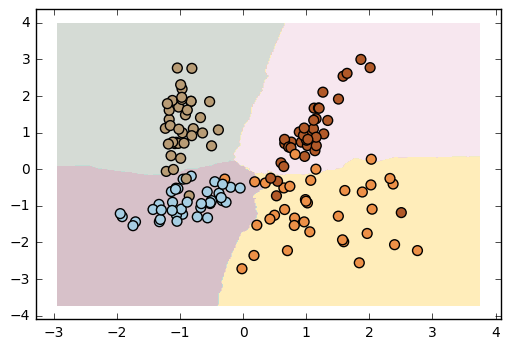

In [21]:
# Vaš kôd ovdje...
X_art, y_art = make_classification(n_samples=150, n_features=2, n_classes=4, n_redundant=0, n_clusters_per_class=1)
knn = KNC(n_neighbors=18).fit(X_art, y_art)
mlutils.plot_2d_clf_problem(X_art, y_art,lambda x: knn.predict(x))

**Q:** Kako $k$ utječe na izgled granice između klasa? A broj primjera $N$?

### 6. Analiza algoritma k-najbližih susjeda

Algoritam k-nn ima hiperparametar $k$ (broj susjeda). Taj hiperparametar izravno utječe na složenost algoritma, pa je stoga izrazito važno dobro odabrati njegovu vrijednost. Kao i kod mnogih drugih algoritama, tako i kod algoritma k-nn optimalna vrijednost hiperametra $k$ ovisi o konkretnom problemu, uključivo broju primjera $N$, broju značajki (dimenzija) $n$ te broju klasa $K$.

#### (a)

Kako bismo dobili pouzdanije rezultate, potrebno je mjerenja ponoviti na različitim skupovima podataka i zatim uprosječiti dobivene vrijednosti pogrešaka. Definirajte funkciju

> `knn_eval(n_instances=100, n_features=2, n_classes=2, n_informative=2, test_size=0.3, k_range=(1, 20), n_trials=100)`

koja trenira i ispituje model k-nn na ukupno `n_instances` primjera, i to tako da za svaku vrijednost hiperparametra iz zadanog intervala `k_range` ponovi `n_trials` mjerenja, generirajući za svako od njih nov skup podataka pomoću funkcije [`datasets.make_classification`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) i dijeleći ga na skup za učenje i skup za ispitivanje koristeći funkciju [`sklearn.cross_validation.train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html). Udio skupa za ispitivanje definiran je parametrom `test_size`. Vrijednosti parametara `n_instances`, `n_features`, `n_classes` i `n_informative` proslijedite funkciji `make_classification` te dodatno postavite `n_redundant=0` i `n_clusters_per_class=1`. Povratne vrijednosti funkcije jest trojka `(best_k, train_errors, test_errors)`. Vrijednost `best_k` je optimalna vrijednost hiperparametra $k$ (vrijednost za koju je pogreška na skupu za ispitivanje najmanja). Vrijednosti `train_errors` i `test_errors`  liste su pogrešaka na skupu za učenja odnosno skupu za testiranje za sve razmatrane vrijednosti hiperparametra $k$.

In [22]:
from sklearn.cross_validation import train_test_split

def knn_eval(n_instances=100, n_features=2, n_classes=2, n_informative=2, test_size=0.3, k_range=(1, 20), n_trials=100):
    # Vaš kôd ovdje...
    ks = np.arange(k_range[0],k_range[1]+1)
    errors_all = []
    
    for k in ks:
        errors = []
        for it in range(n_trials):
            X_, y_ = make_classification(n_samples=n_instances, n_features=n_features, n_classes=n_classes, n_informative=n_informative,n_redundant=0, n_clusters_per_class=1)
            X_train, X_test, y_train, y_test = train_test_split(X_, y_, train_size=1-test_size)       
            
            l = []
            for X, y in [(X_train,y_train), (X_test,y_test)]:
                knc = KNC(n_neighbors=k)
                knc.fit(X_train,y_train)
                score = knc.score(X,y)
                res = 1 - score
                l.append(res)
            
            errors.append(l)
        
        average = np.average(errors,axis=0)
        errors_all.append(average)
    
    errors_all = np.array(errors_all)
    
    train_errors = errors_all[:, 0]
    test_errors = errors_all[:, 1]
    k_best = ks[np.argmin(test_errors)]
    
    return k_best, train_errors, test_errors

#### (b)

Pomoću funkcije `knn_eval` iz (a) dijela zadatka, iscrtajte pogrešku učenja i ispitivanja kao funkcije hiperparametra $k$, $k\in\{1,\dots,20\}$, za $N=200$ primjera. Ispišite i optimalnu vrijednost za $k$.

10


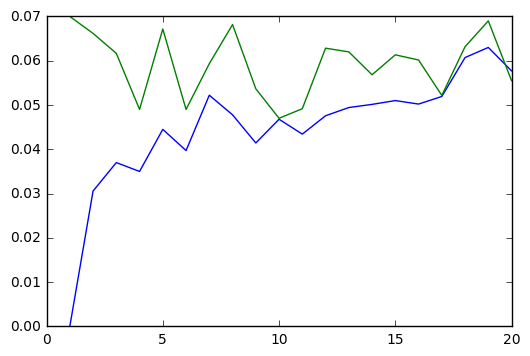

In [23]:
# Vaš kôd ovdje...
best_k, train_errors, test_errors = knn_eval(200)
plt.plot(np.arange(1,21),train_errors)
plt.plot(np.arange(1,21),test_errors)

print best_k

**Q:** Kojem području odgovara prenaučenost, a kojem podnaučenost modela? Zašto? <br>
**Q:** Je li uvijek moguće doseći pogrešku od 0 na skupu za učenje?

#### (c)

Pomoću funkcije `knn_eval` iz (a) dijela zadatka, iscrtajte pogreške učenja i ispitivanja kao funkcije hiperparametra $k$, $k\in\{1,\dots,20\}$, za $N=\{100, 500, 1000, 3000\}$ primjera. Načinite 4 zasebna grafikona (generirajte ih u 2x2 polju). U svakoj iteraciji ispišite optimalnu vrijednost hiperparametra $k$ (najlakše kao naslov grafikona).

N = 0, k_best = 3
N = 1, k_best = 4
N = 2, k_best = 20
N = 3, k_best = 17


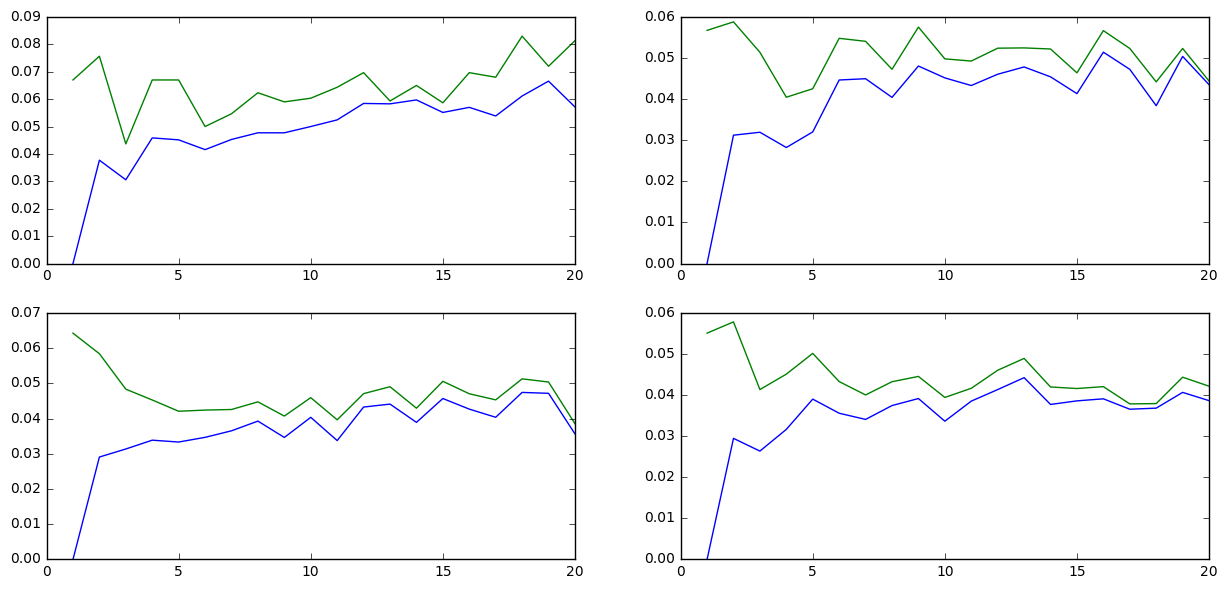

In [24]:
# Vaš kôd ovdje...
plt.figure(figsize=(15,7))
ks = np.arange(1,21)

for i, N in enumerate([100,500,1000,3000]):
    k_best, t1, t2 = knn_eval(N)
    plt.subplot(2, 2, i+1)
    plt.plot(ks, t1)
    plt.plot(ks, t2)
    
    print "N = " + str(i) + ", k_best = " + str(k_best)

### 7. Nerobusnost algoritma k-nn

Svrha ovog zadatka jest analizirati u kojoj je mjeri algoritam k-nn osjetljiv na razlike u mjernoj skali između pojedinih dimenzija te na prisutnost nebitnih značajki.

#### (a)

Krenite od umjetnog skupa podataka danog u nastavku. Zatim napravite kopiju tog skupa podataka (pogledajte [`copy.deepcopy`](https://docs.python.org/2/library/copy.html#copy.deepcopy)) i preinačite ju tako da jednu dimenziju pomnožite sa 100. Oba skupa podijelite na skup za učenje i skup za ispitivanje u omjeru 7:3, pri čemu obratite pozornost na to da oba skupa podijelite na identičan način. Trenirajte modele k-nn na skaliranoj i neskaliranoj inačici skupa za učenje (s pretpostavljenim parametrima), a zatim ispitajte model na odgovarajućim ispitnim inačicama skupova.

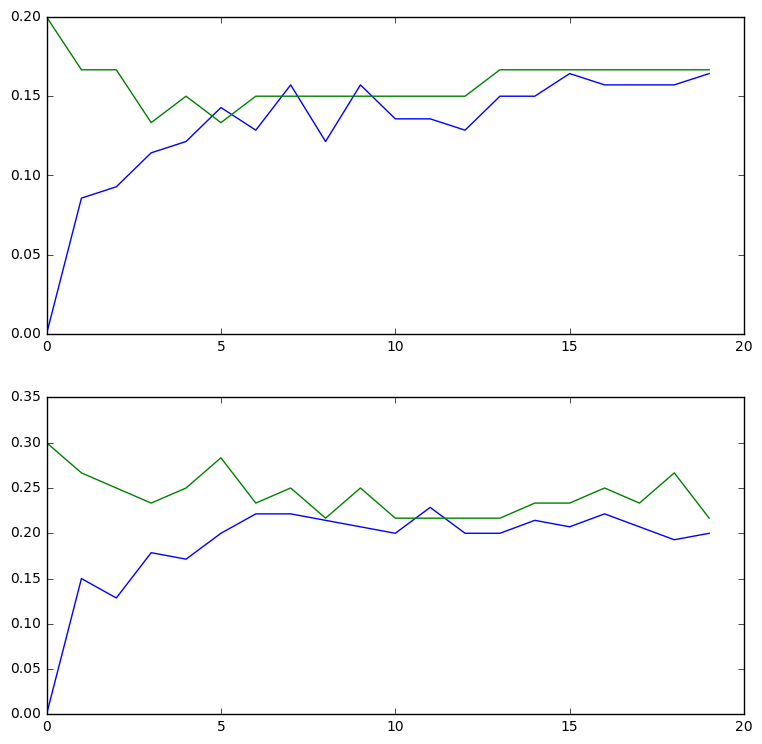

In [169]:
from copy import deepcopy
X, y = make_classification(n_samples=200, n_features=2, n_classes=2, n_redundant=0, n_clusters_per_class=2)
# Vaš kôd ovdje...

def plot_errors(X_train, X_test, y_train, y_test):
    l = []
    for k in range(1,21):
        knc = KNC(n_neighbors=k).fit(X_train, y_train)
        l.append([1-knc.score(X_train, y_train)])
    plt.plot(l)
    
    l = []
    for k in range(1,21):
        knc = KNC(n_neighbors=k).fit(X_train, y_train)
        l.append([1-knc.score(X_test, y_test)])
    plt.plot(l)

X_train_1, X_test_1, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

X_train_2 = deepcopy(X_train_1)
X_train_2[:, 0] *=100

X_test_2 = deepcopy(X_test_1)
X_test_2[:, 0] *=100
    
plt.figure(figsize=(9,9))
plt.subplot(211)    
plot_errors(X_train_1, X_test_1, y_train, y_test)
plt.subplot(212)
plot_errors(X_train_2, X_test_2, y_train, y_test)
plt.show()

**Q:** Zašto je ovaj problem tako izražen kod algoritma k-nn?

#### (b)

Kako bismo provjerili u kojoj je mjeri algoritam k-nn osjetljiv na prisustvo nebitnih značajki, možemo iskoristiti funkciju `make_classification` kako bismo generirali skup primjera kojemu su neke od značajki nebitne. Naime, parametar `n_informative` određuje broj bitnih značajki, dok parametar `n_features` određuje ukupan broj značajki. Ako je `n_features > n_informative`, onda će neke od značajki biti nebitne. Umjesto da izravno upotrijebimo funkciju `make_classification`, upotrijebit ćemo funkciju `knn_eval` iz zadatka (7a), jer ćemo na taj način dobiti pouzdanije procjene.

Koristite funkciju `knn_eval` na dva načina. U oba koristite $N=1000$ primjera, $n=10$ značajki i $K=5$ klasa, ali za prvi neka su svih 10 značajki bitne, a za drugi neka je bitno samo 5 od 10 značajki. Ispišite pogreške učenja i ispitivanja za oba modela za optimalnu vrijednost $k$ (vrijednost za koju je ispitna pogreška najmanja).

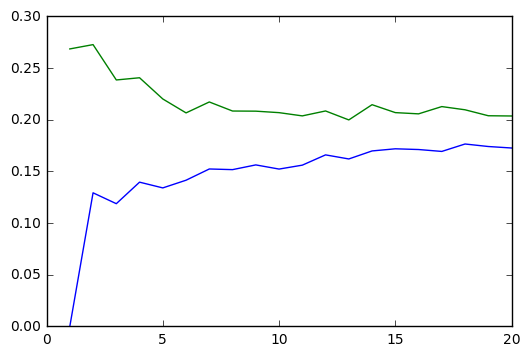

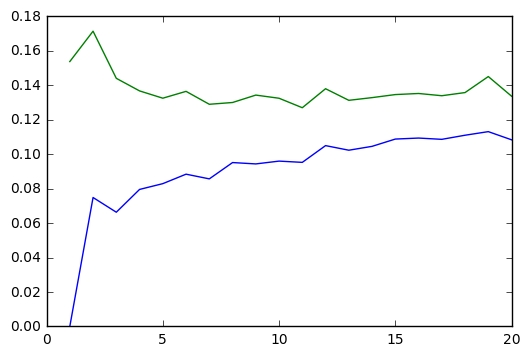

In [170]:
# Vaš kôd ovdje...
for n_i in [5,10]:
    best, test_errors, train_errors = knn_eval(1000, n_features=10, n_classes=5,n_informative=n_i)
    ks = np.arange(1,21)
    plt.plot(ks,test_errors)
    plt.plot(ks,train_errors)
    plt.show() 

**Q:** Zašto nebitne značajke ovoliko utječu na perfomanse modela?